# DL Based Approach for Diagnosis of Retinal Diseases from OCT Images

<b>Overview</b>

1.	Retinal optical coherence tomography (OCT) is an imaging technique for capturing high-resolution cross sections of living patients' retinas.
2.	OCT enables the ophthalmologist to visualise the retina's different layers. This lets the doctor map and measure their thickness. These analysis aid in the diagnosing process.
3.	OCT testing has become the standard way to look at and treat most eye problems. OCT uses rays of light to measure the thickness of retina. This examination does not include the use of radiation or X-rays, and an OCT scan is neither painful nor uncomfortable.
4.	Every year, around 30 million OCT scans are taken, and the analysis and interpretation of these pictures takes a lot of time (Swanson and Fujimoto, 2017).
5.	OCT is beneficial for identifying a variety of eye disorders, including the following: 
<ul>
•	age-related macular degeneration (AMD) <br>
•	diabetic retinopathy (diabetic eye disease)
</ul>


<b>Dataset Description</b>


The dataset can be downloaded from https://www.kaggle.com/datasets/paultimothymooney/kermany2018?datasetId=17839&sortBy=voteCount. <br>
The dataset is divided into three folders (train, test, and validation), each of which contains a subfolder for each image category (NORMAL, CNV, DME, DRUSEN). There are 84,495 X-Ray images (JPEG) and four classes (NORMAL, CNV, DME, DRUSEN). <br>
Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.


<b>Problem Statement</b>


The objective is given retinal OCT Images (optical coherence tomography) classify a new retinal image belonging to one of the four categories (CNV, DME, DRUNSEN, NORMAL).


<b>Evaluation Metric</b> <br>
Confusion Matrix: <br>
Our model's performance can be diagnosed more accurately with the help of confusion matrix. A confusion matrix is a summary of classification problem prediction outcomes. The number of correct and incorrect predictions is summarized with count values and broken down by each class. The confusion matrix depicts the various ways in which our classification model is perplexed when making predictions. This technique sheds light not only on the errors made by our classifier, but also on the types of errors caused by the models. The confusion matrix can be used to calculate the values of true positive (TP), true negative (TN), false positive (FP) and false-negative (FN).
TP stands for correctly predicted positive class; 
FP stands for incorrectly predicted positive class; 
FN stands for incorrectly predicted negative class; and 
TN stands for correctly predicted negative class.

## Import relevant libraries and load dataset

In [1]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
from random import sample, choice
import pandas as pd

In [2]:
# print number of unique classes in the datset
print("Classes in Training Dataset  :",os.listdir("OCT2017/train"))
print("Classes in Validation Dataset:",os.listdir("OCT2017/val"))
print("Classes in Test Dataset      :",os.listdir("OCT2017/test"))

Classes in Training Dataset  : ['CNV', 'DME', 'DRUSEN', 'NORMAL']
Classes in Validation Dataset: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
Classes in Test Dataset      : ['CNV', 'DME', 'DRUSEN', 'NORMAL']


<b>Observations: </b>
1. The dataset is divided into three folders- train, val, and test.
2. Each folder (train, val, and test) contains a subfolder for each image category namely CNV, DME, DRUNSEN, and NORMAL.

## Plotting for Exploratory Data Analysis (EDA)

### Number of each category images in train, val, and test folder

In [3]:
# Number of each category images present in training dataset
print("Number of CNV images in Training Dataset    :",len(os.listdir("OCT2017/train/CNV/")))
print("Number of DME images in Training Dataset    :",len(os.listdir("OCT2017/train/DME/")))
print("Number of DRUNSEN images in Training Dataset:",len(os.listdir("OCT2017/train/DRUSEN/")))
print("Number of NORMAL images in Training Dataset :",len(os.listdir("OCT2017/train/NORMAL/")))

Number of CNV images in Training Dataset    : 37205
Number of DME images in Training Dataset    : 11348
Number of DRUNSEN images in Training Dataset: 8616
Number of NORMAL images in Training Dataset : 26315


In [4]:
# Number of each category images present in validation dataset
print("Number of CNV images in Validation Dataset    :",len(os.listdir("OCT2017/val/CNV/")))
print("Number of DME images in Validation Dataset    :",len(os.listdir("OCT2017/val/DME/")))
print("Number of DRUNSEN images in Validation Dataset:",len(os.listdir("OCT2017/val/DRUSEN/")))
print("Number of NORMAL images in Validation Dataset :",len(os.listdir("OCT2017/val/NORMAL/")))

Number of CNV images in Validation Dataset    : 8
Number of DME images in Validation Dataset    : 8
Number of DRUNSEN images in Validation Dataset: 8
Number of NORMAL images in Validation Dataset : 8


In [5]:
# Number of each category images present in test dataset
print("Number of CNV images in Test Dataset    :",len(os.listdir("OCT2017/test/CNV/")))
print("Number of DME images in Test Dataset    :",len(os.listdir("OCT2017/test/DME/")))
print("Number of DRUNSEN images in Test Dataset:",len(os.listdir("OCT2017/test/DRUSEN/")))
print("Number of NORMAL images in Test Dataset :",len(os.listdir("OCT2017/test/NORMAL/")))

Number of CNV images in Test Dataset    : 242
Number of DME images in Test Dataset    : 242
Number of DRUNSEN images in Test Dataset: 242
Number of NORMAL images in Test Dataset : 242


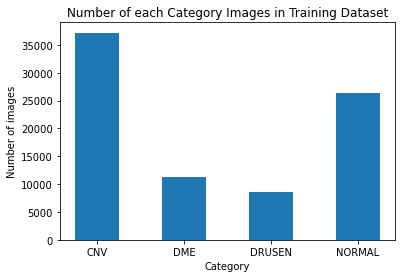

In [6]:
# plot number of each category images present in training dataset
train_categories = {'CNV':len(os.listdir("OCT2017/train/CNV/")),
                    'DME':len(os.listdir("OCT2017/train/DME/")),
                    'DRUSEN':len(os.listdir("OCT2017/train/DRUSEN/")),
                    'NORMAL':len(os.listdir("OCT2017/train/NORMAL/"))}

categories = list(train_categories.keys())
length_categories = list(train_categories.values())

# Bar Plot
plt.bar(categories, length_categories, width=0.5)
plt.xlabel("Category")
plt.ylabel("Number of images")
plt.title("Number of each Category Images in Training Dataset")
plt.show()

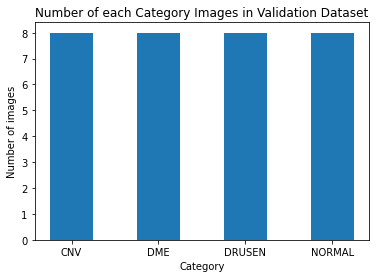

In [7]:
# plot number of each category images present in validation dataset
validation_categories = {'CNV':len(os.listdir("OCT2017/val/CNV/")),
                    'DME':len(os.listdir("OCT2017/val/DME/")),
                    'DRUSEN':len(os.listdir("OCT2017/val/DRUSEN/")),
                    'NORMAL':len(os.listdir("OCT2017/val/NORMAL/"))}

categories = list(validation_categories.keys())
length_categories = list(validation_categories.values())

# Bar Plot
plt.bar(categories, length_categories, width=0.5)
plt.xlabel("Category")
plt.ylabel("Number of images")
plt.title("Number of each Category Images in Validation Dataset")
plt.show()

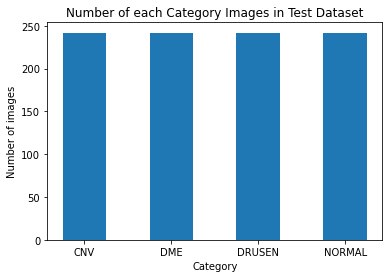

In [8]:
# plot number of each category images present in test dataset
test_categories = {'CNV':len(os.listdir("OCT2017/test/CNV/")),
                    'DME':len(os.listdir("OCT2017/test/DME/")),
                    'DRUSEN':len(os.listdir("OCT2017/test/DRUSEN/")),
                    'NORMAL':len(os.listdir("OCT2017/test/NORMAL/"))}

categories = list(test_categories.keys())
length_categories = list(test_categories.values())

# Bar Plot
plt.bar(categories, length_categories, width=0.5)
plt.xlabel("Category")
plt.ylabel("Number of images")
plt.title("Number of each Category Images in Test Dataset")
plt.show()

<b>Observations:</b> 

After analyzing the data we can clearly observe that
1. The dataset consists of 84,495 X-Ray images (JPEG) and four classes (NORMAL, CNV, DME, DRUSEN).
2. Training Dataset is highly imbalanced with classes DME and DRUSEN having very less number of images. 
3. In training dataset CNV class consists of 37205 number of images, DME class consists of 11348 number of images, DRUSEN class consists of 8616 number of images, and NORMAL class consists 26315 number of images. 
4. Validation Dataset is balanced with each class having 8 images.
5. Test Dataset is balanced with each class having 242 images.

### Shape of images in the train dataset

In [9]:
# shape of images belonging to CNV class in train dataset
cnv_shape = list()
cnv = os.listdir("OCT2017/train/CNV/")
for i in range(len(cnv)):
    cnv_image = cv2.imread("OCT2017/train/CNV/"+cnv[i])
    cnv_shape.append(cnv_image.shape)


# shape of images belonging to DME class in train dataset
dme_shape = list()
dme = os.listdir("OCT2017/train/DME/")
for i in range(len(dme)):
    dme_image = cv2.imread("OCT2017/train/DME/"+dme[i])
    dme_shape.append(dme_image.shape)


# shape of images belonging to DRUSEN class in train dataset
drusen_shape = list()
drusen = os.listdir("OCT2017/train/DRUSEN/")
for i in range(len(drusen)):
    drusen_image = cv2.imread("OCT2017/train/DRUSEN/"+drusen[i])
    drusen_shape.append(drusen_image.shape)

    
# shape of images belonging to NORMAL class in train dataset
normal_shape = list()
normal = os.listdir("OCT2017/train/NORMAL/")
for i in range(len(normal)):
    normal_image = cv2.imread("OCT2017/train/NORMAL/"+normal[i])
    normal_shape.append(normal_image.shape)


print("Training Dataset:")
print("Shape of images belonging to CNV class    :",set(cnv_shape))
print("Shape of images belonging to DME class    :",set(dme_shape))
print("Shape of images belonging to DRUSEN class :",set(drusen_shape))
print("Shape of images belonging to NORMAL class :",set(normal_shape))

Training Dataset:
Shape of images belonging to CNV class    : {(496, 512, 3), (496, 1024, 3), (496, 384, 3), (496, 1536, 3), (496, 768, 3)}
Shape of images belonging to DME class    : {(496, 512, 3), (496, 1024, 3), (512, 512, 3), (496, 1536, 3), (496, 768, 3)}
Shape of images belonging to DRUSEN class : {(496, 512, 3), (496, 768, 3), (496, 1536, 3), (496, 1024, 3)}
Shape of images belonging to NORMAL class : {(496, 512, 3), (496, 1024, 3), (512, 512, 3), (496, 384, 3), (496, 1536, 3), (496, 768, 3)}


In [10]:
# creating dataframe of heights and widths for each class
# For CNV class
# empty lists
cnv_heights = list()
cnv_widths = list()

for value in (cnv_shape):
    cnv_heights.append(value[0])
    cnv_widths.append(value[1])

# creating cnv_df dataframe
cnv_df = pd.DataFrame({"cnv_heights":cnv_heights, "cnv_widths":cnv_widths})

# For DME class
# empty lists
dme_heights = list()
dme_widths = list()

for value in (dme_shape):
    dme_heights.append(value[0])
    dme_widths.append(value[1])

# creating dme_df dataframe
dme_df = pd.DataFrame({"dme_heights":dme_heights, "dme_widths":dme_widths})

# For DRUSEN class
# empty lists
drusen_heights = list()
drusen_widths = list()

for value in (drusen_shape):
    drusen_heights.append(value[0])
    drusen_widths.append(value[1])

# creating drusen_df dataframe
drusen_df = pd.DataFrame({"drusen_heights":drusen_heights, "drusen_widths":drusen_widths})

# For NORMAL class
# empty lists
normal_heights = list()
normal_widths = list()

for value in (normal_shape):
    normal_heights.append(value[0])
    normal_widths.append(value[1])

# creating normal_df dataframe
normal_df = pd.DataFrame({"normal_heights":normal_heights, "normal_widths":normal_widths})

Histogram of heights and widths for CNV class


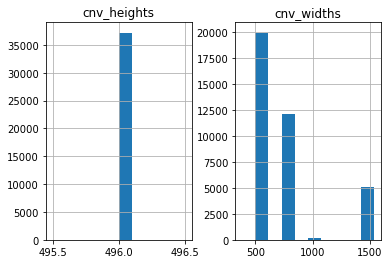

In [11]:
# plot histogram of heights and widths for CNV class
print("Histogram of heights and widths for CNV class")
hist = cnv_df.hist()

Histogram of heights and widths for DME class


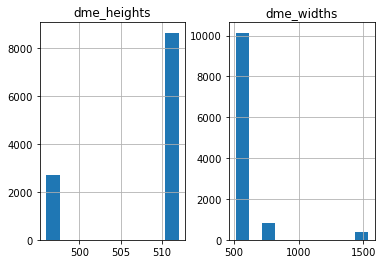

In [12]:
# plot histogram of heights and widths for DME class
print("Histogram of heights and widths for DME class")
hist = dme_df.hist()

Histogram of heights and widths for DRUSEN class


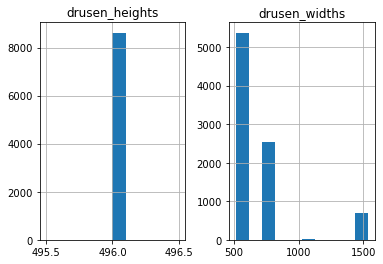

In [13]:
# plot histogram of heights and widths for DRUSEN class
print("Histogram of heights and widths for DRUSEN class")
hist = drusen_df.hist()

Histogram of heights and widths for NORMAL class


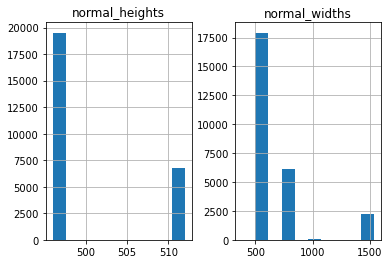

In [14]:
# plot histogram of heights and widths for NORMAL class
print("Histogram of heights and widths for NORMAL class")
hist = normal_df.hist()

<b>Observations</b>

1. We can observe that images belonging to each class have different shapes.
2. By looking at the shapes of the images, we can observe that they have three channels.

## print random images from each category

CLASS CNV


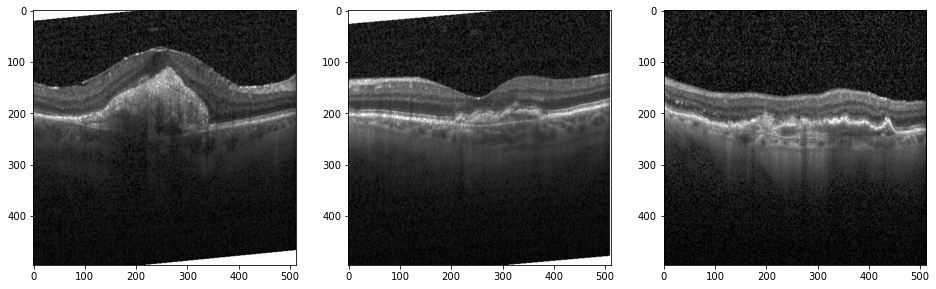

In [15]:
# print 3 random images from CNV
# Reference: https://www.kaggle.com/code/kmader/detect-retina-damage-from-oct-images-hr
sample_img = sample(glob("OCT2017/train/CNV/**"),3)
plt.figure(figsize=(16,16))
print("CLASS CNV")
plt.subplot(131)
plt.imshow(cv2.imread(sample_img[0]))
plt.subplot(132)
plt.imshow(cv2.imread(sample_img[1]))
plt.subplot(133)
plt.imshow(cv2.imread(sample_img[2]))
plt.show()

CLASS DME


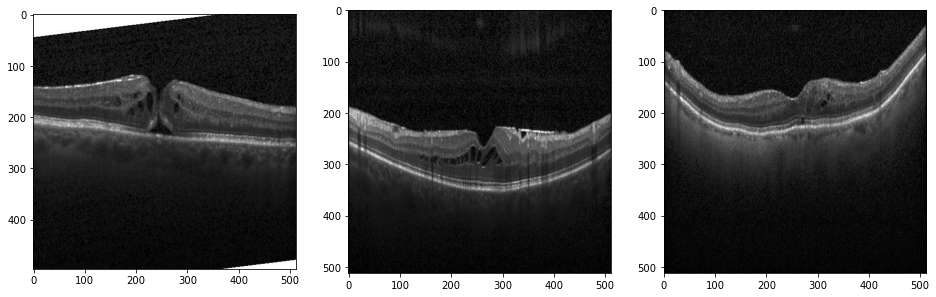

In [16]:
# print 3 random images from class DME
# Reference: https://www.kaggle.com/code/kmader/detect-retina-damage-from-oct-images-hr
sample_img = sample(glob("OCT2017/train/DME/**"),3)
plt.figure(figsize=(16,16))
print("CLASS DME")
plt.subplot(131)
plt.imshow(cv2.imread(sample_img[0]))
plt.subplot(132)
plt.imshow(cv2.imread(sample_img[1]))
plt.subplot(133)
plt.imshow(cv2.imread(sample_img[2]))
plt.show()

CLASS DRUSEN


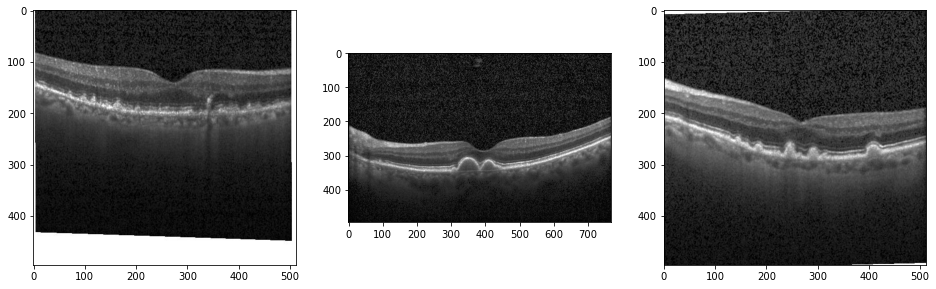

In [17]:
# print 3 random images from class DRUSEN
# Reference: https://www.kaggle.com/code/kmader/detect-retina-damage-from-oct-images-hr
sample_img = sample(glob("OCT2017/train/DRUSEN/**"),3)
plt.figure(figsize=(16,16))
print("CLASS DRUSEN")
plt.subplot(131)
plt.imshow(cv2.imread(sample_img[0]))
plt.subplot(132)
plt.imshow(cv2.imread(sample_img[1]))
plt.subplot(133)
plt.imshow(cv2.imread(sample_img[2]))
plt.show()

CLASS NORMAL


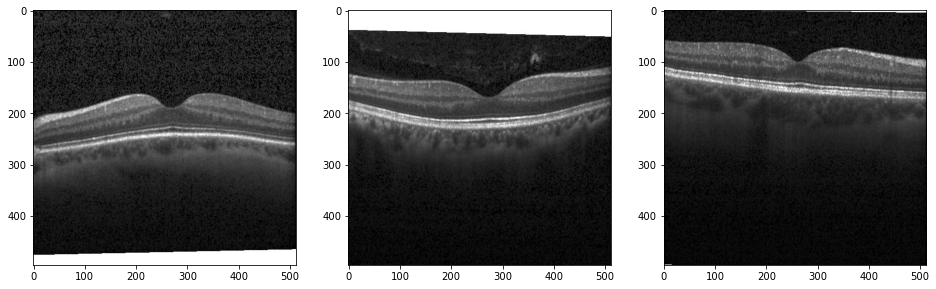

In [18]:
# print 3 random images from class NORMAL
sample_img = sample(glob("OCT2017/train/NORMAL/**"),3)
plt.figure(figsize=(16,16))
print("CLASS NORMAL")
plt.subplot(131)
plt.imshow(cv2.imread(sample_img[0]))
plt.subplot(132)
plt.imshow(cv2.imread(sample_img[1]))
plt.subplot(133)
plt.imshow(cv2.imread(sample_img[2]))
plt.show()

<b>Observations:</b>

1. We can observe that images belonging to each class have different shape.
2. We can also observe that the categories CNV and DME can be distinguished from DRUSEN and NORMAL by the presence of a large curve in the images.

### Slice the image into red, green, and blue channels

CLASS CNV


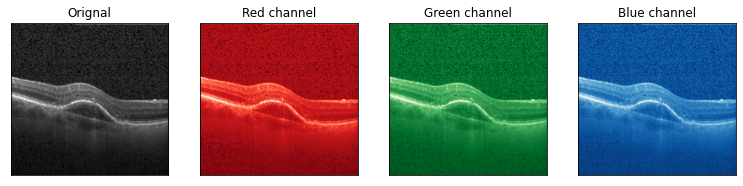

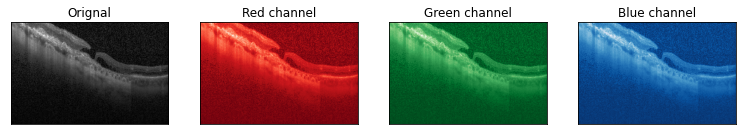

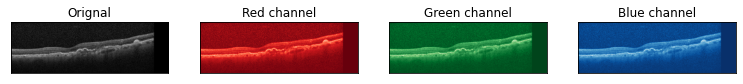

In [19]:
# Reference: https://stackoverflow.com/questions/37431599/how-to-slice-an-image-into-red-green-and-blue-channels-with-misc-imread
# slice 3 random images belonging to class CNV into red, green, and blue channels
print("CLASS CNV")

CNV = os.listdir("OCT2017/train/CNV/")

titles = ['Orignal', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

for i in range(3):
    img = cv2.imread("OCT2017/train/CNV/"+choice(CNV))
    fig, axes = plt.subplots(1, 4, figsize=(13,3))
    objs = zip(axes, (img, *img.transpose(2,0,1)), titles, cmaps)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

CLASS DME


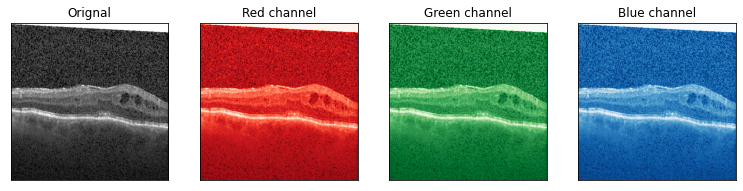

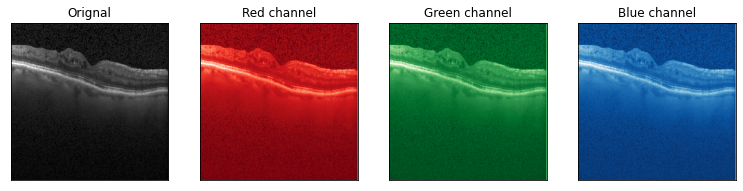

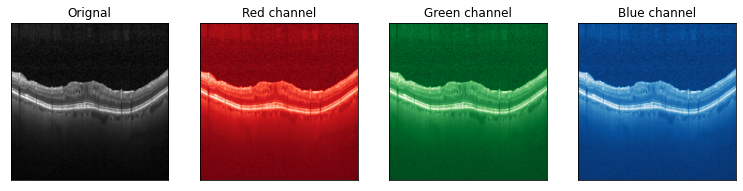

In [20]:
# Reference: https://stackoverflow.com/questions/37431599/how-to-slice-an-image-into-red-green-and-blue-channels-with-misc-imread
# slice 3 random images belonging to class DME into red, green, and blue channels
print("CLASS DME")

DME = os.listdir("OCT2017/train/DME/")

titles = ['Orignal', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

for i in range(3):
    img = cv2.imread("OCT2017/train/DME/"+choice(DME))
    fig, axes = plt.subplots(1, 4, figsize=(13,3))
    objs = zip(axes, (img, *img.transpose(2,0,1)), titles, cmaps)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

CLASS DRUSEN


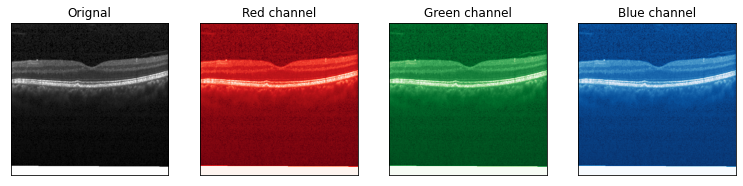

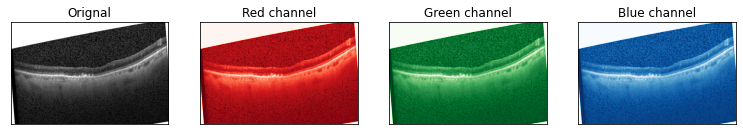

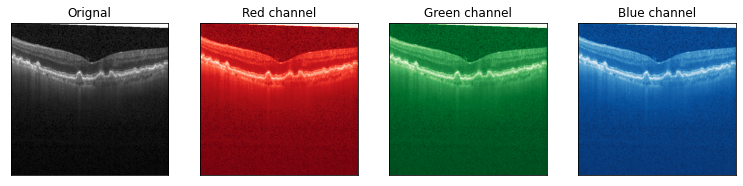

In [21]:
# Reference: https://stackoverflow.com/questions/37431599/how-to-slice-an-image-into-red-green-and-blue-channels-with-misc-imread
# slice 3 random images belonging to class DRUSEN into red, green, and blue channels
print("CLASS DRUSEN")

DME = os.listdir("OCT2017/train/DRUSEN/")

titles = ['Orignal', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

for i in range(3):
    img = cv2.imread("OCT2017/train/DRUSEN/"+choice(DME))
    fig, axes = plt.subplots(1, 4, figsize=(13,3))
    objs = zip(axes, (img, *img.transpose(2,0,1)), titles, cmaps)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

CLASS NORMAL


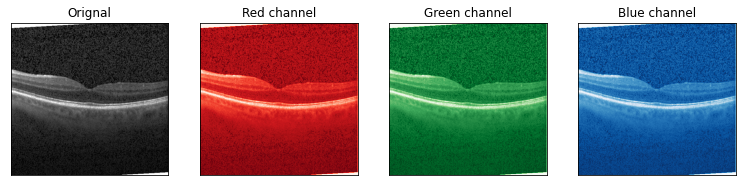

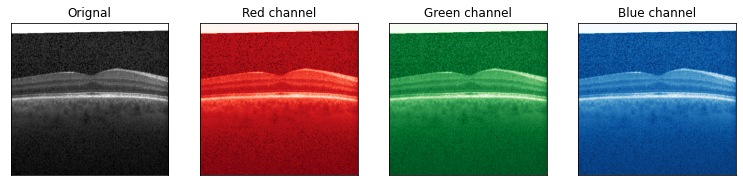

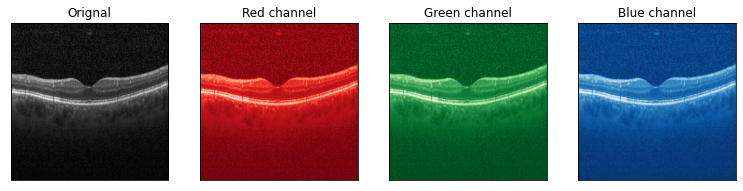

In [22]:
# Reference: https://stackoverflow.com/questions/37431599/how-to-slice-an-image-into-red-green-and-blue-channels-with-misc-imread
# slice 3 random images belonging to class NORMAL into red, green, and blue channels
print("CLASS NORMAL")

DME = os.listdir("OCT2017/train/NORMAL/")

titles = ['Orignal', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

for i in range(3):
    img = cv2.imread("OCT2017/train/NORMAL/"+choice(DME))
    fig, axes = plt.subplots(1, 4, figsize=(13,3))
    objs = zip(axes, (img, *img.transpose(2,0,1)), titles, cmaps)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

<b>Observations:</b>

We are presenting some random images belonging to each class with their three separate channels that is red, green, and blue channels.

#### Observations:
1. The dataset is divided into three folders (train, test, and validation), each of which contains a subfolder for each image category (NORMAL, CNV, DME, DRUSEN). 
2. There are 84,495 X-Ray images (JPEG) and four classes (NORMAL, CNV, DME, DRUSEN).
3. Training Dataset is slightly imbalanced with classes DME and DRUSEN having very less number of images.
4. We can observe that images belonging to each class have different shapes.
5. Also, by looking at the shapes of the images, we can observe that they have three channels i.e., red, green, and blue channels.

#### Takeaways:
1. We need to bring the images to same shape.
2. Data pre-processing is one of the most critical aspects of this Kaggle problem. We will perform image augmentation i.e., we will take existing photos from our training dataset and apply image transformation operations to them, such as rotation, shearing, translation, zooming, and so on, to create new, altered versions of those images.
3. We can start by applying a simple CNN model and see how it is performing on the given dataset.